## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
# Dropout_EXP = [0.15, 0.2, 0.25, 0.3, 0.35]
# 減少次數
Dropout_EXP = [0.1, 0.2, 0.4]
# 修正：加上不同Layer
LAYER_NEURONS = [[128, 128, 128], [128, 256, 256], [128, 256, 512]]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
import itertools

# for dp in Dropout_EXP:
for i, (dp, layer) in enumerate(itertools.product(Dropout_EXP, LAYER_NEURONS)):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment: %i with Dropout_EXP = %.6f, LAYER_NEURONS: %s" % (i, dp, layer))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dp, num_neurons=layer)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-dp-%s-layer-%s" % (str(dp), str(layer))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment: 0 with Dropout_EXP = 0.100000, LAYER_NEURONS: [128, 128, 128]


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer3 

Epoch 35/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.3960 - acc: 0.4991 - val_loss: 1.4278 - val_acc: 0.4901
Epoch 36/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.3936 - acc: 0.5014 - val_loss: 1.4274 - val_acc: 0.4915
Epoch 37/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.3884 - acc: 0.5023 - val_loss: 1.4254 - val_acc: 0.4930
Epoch 38/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.3808 - acc: 0.5045 - val_loss: 1.4239 - val_acc: 0.4939
Epoch 39/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.3786 - acc: 0.5060 - val_loss: 1.4216 - val_acc: 0.4941
Epoch 40/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.3739 - acc: 0.5055 - val_loss: 1.4000 - val_acc: 0.5023
Epoch 41/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.3859 - acc: 0.5010 - val_loss: 1.4146 - val_acc: 0.4959
Epoch 42/50
50000/50000 [=========

50000/50000 [==============================] - 4s 72us/step - loss: 1.3777 - acc: 0.5039 - val_loss: 1.4227 - val_acc: 0.5007
Epoch 34/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.3750 - acc: 0.5054 - val_loss: 1.3943 - val_acc: 0.5088
Epoch 35/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.3674 - acc: 0.5088 - val_loss: 1.3971 - val_acc: 0.5047
Epoch 36/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.3678 - acc: 0.5072 - val_loss: 1.4233 - val_acc: 0.4925
Epoch 37/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.3518 - acc: 0.5129 - val_loss: 1.4039 - val_acc: 0.5047
Epoch 38/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.3586 - acc: 0.5111 - val_loss: 1.3963 - val_acc: 0.5044
Epoch 39/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.3530 - acc: 0.5111 - val_loss: 1.3921 - val_acc: 0.5081
Epoch 40/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 69us/step - loss: 1.3178 - acc: 0.5248 - val_loss: 1.3676 - val_acc: 0.5078
Epoch 32/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.3129 - acc: 0.5245 - val_loss: 1.3803 - val_acc: 0.5088
Epoch 33/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.3027 - acc: 0.5291 - val_loss: 1.4037 - val_acc: 0.4951
Epoch 34/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.3019 - acc: 0.5298 - val_loss: 1.3952 - val_acc: 0.5040
Epoch 35/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.3000 - acc: 0.5306 - val_loss: 1.4365 - val_acc: 0.4864
Epoch 36/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2907 - acc: 0.5326 - val_loss: 1.3845 - val_acc: 0.5043
Epoch 37/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2752 - acc: 0.5406 - val_loss: 1.3898 - val_acc: 0.5097
Epoch 38/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 67us/step - loss: 1.6381 - acc: 0.4058 - val_loss: 1.5865 - val_acc: 0.4333
Epoch 30/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.6317 - acc: 0.4108 - val_loss: 1.5873 - val_acc: 0.4407
Epoch 31/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6353 - acc: 0.4094 - val_loss: 1.5913 - val_acc: 0.4346
Epoch 32/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6276 - acc: 0.4122 - val_loss: 1.5683 - val_acc: 0.4437
Epoch 33/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6357 - acc: 0.4113 - val_loss: 1.5630 - val_acc: 0.4413
Epoch 34/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6283 - acc: 0.4130 - val_loss: 1.5394 - val_acc: 0.4449
Epoch 35/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6241 - acc: 0.4135 - val_loss: 1.5597 - val_acc: 0.4379
Epoch 36/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 67us/step - loss: 1.6585 - acc: 0.3993 - val_loss: 1.5907 - val_acc: 0.4389
Epoch 28/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6572 - acc: 0.4007 - val_loss: 1.5736 - val_acc: 0.4375
Epoch 29/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6575 - acc: 0.4009 - val_loss: 1.5795 - val_acc: 0.4365
Epoch 30/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6462 - acc: 0.4051 - val_loss: 1.6330 - val_acc: 0.4189
Epoch 31/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6456 - acc: 0.4071 - val_loss: 1.5811 - val_acc: 0.4383
Epoch 32/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6391 - acc: 0.4099 - val_loss: 1.5946 - val_acc: 0.4323
Epoch 33/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6379 - acc: 0.4095 - val_loss: 1.6112 - val_acc: 0.4281
Epoch 34/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 68us/step - loss: 1.6367 - acc: 0.4123 - val_loss: 1.6033 - val_acc: 0.4261
Epoch 26/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6324 - acc: 0.4136 - val_loss: 1.5995 - val_acc: 0.4314
Epoch 27/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6326 - acc: 0.4111 - val_loss: 1.5895 - val_acc: 0.4298
Epoch 28/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6295 - acc: 0.4119 - val_loss: 1.5483 - val_acc: 0.4494
Epoch 29/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6270 - acc: 0.4146 - val_loss: 1.5400 - val_acc: 0.4542
Epoch 30/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6180 - acc: 0.4175 - val_loss: 1.5539 - val_acc: 0.4437
Epoch 31/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6145 - acc: 0.4212 - val_loss: 1.5497 - val_acc: 0.4469
Epoch 32/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 66us/step - loss: 1.9938 - acc: 0.2512 - val_loss: 2.0162 - val_acc: 0.2699
Epoch 24/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.9950 - acc: 0.2467 - val_loss: 1.9357 - val_acc: 0.2875
Epoch 25/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.9923 - acc: 0.2513 - val_loss: 2.0444 - val_acc: 0.2472
Epoch 26/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.9993 - acc: 0.2498 - val_loss: 1.9992 - val_acc: 0.2680
Epoch 27/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.9897 - acc: 0.2518 - val_loss: 2.0306 - val_acc: 0.2572
Epoch 28/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.9903 - acc: 0.2536 - val_loss: 2.0099 - val_acc: 0.2597
Epoch 29/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.9923 - acc: 0.2526 - val_loss: 1.9993 - val_acc: 0.2646
Epoch 30/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 66us/step - loss: 1.9981 - acc: 0.2498 - val_loss: 2.0040 - val_acc: 0.2643
Epoch 22/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.9991 - acc: 0.2501 - val_loss: 2.0188 - val_acc: 0.2507
Epoch 23/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.9964 - acc: 0.2486 - val_loss: 2.0873 - val_acc: 0.2309
Epoch 24/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.9955 - acc: 0.2525 - val_loss: 2.0639 - val_acc: 0.2475
Epoch 25/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.9937 - acc: 0.2503 - val_loss: 1.9861 - val_acc: 0.2773
Epoch 26/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.9940 - acc: 0.2524 - val_loss: 1.9779 - val_acc: 0.2615
Epoch 27/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.9943 - acc: 0.2494 - val_loss: 1.9726 - val_acc: 0.2694
Epoch 28/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 68us/step - loss: 1.9258 - acc: 0.2758 - val_loss: 1.9709 - val_acc: 0.2998
Epoch 20/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.9274 - acc: 0.2778 - val_loss: 1.9763 - val_acc: 0.2890
Epoch 21/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9207 - acc: 0.2805 - val_loss: 1.9870 - val_acc: 0.2862
Epoch 22/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9138 - acc: 0.2845 - val_loss: 2.0101 - val_acc: 0.2870
Epoch 23/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.9141 - acc: 0.2876 - val_loss: 1.9397 - val_acc: 0.2952
Epoch 24/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9183 - acc: 0.2847 - val_loss: 1.9255 - val_acc: 0.3103
Epoch 25/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.9076 - acc: 0.2882 - val_loss: 1.9905 - val_acc: 0.2806
Epoch 26/50
50000/50000 [=====================

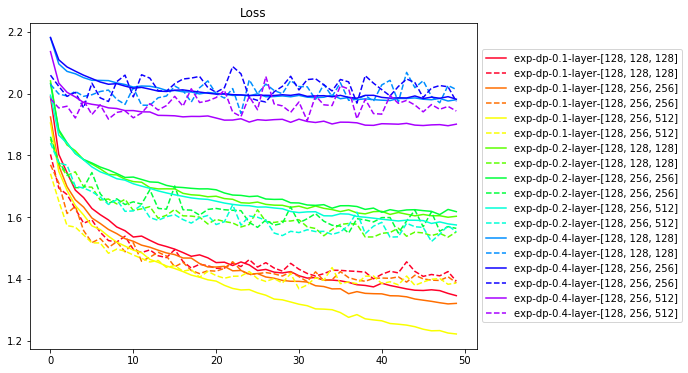

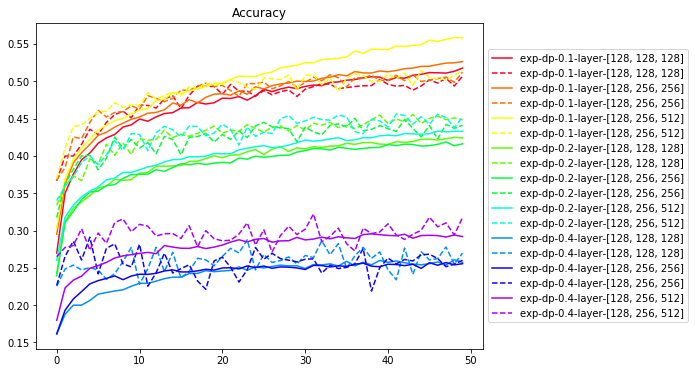

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
# color_bar = ["r", "g", "b", "y", "m", "k"]
# 顏色太多種
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Accuracy")
plt.show()